# PHYS591000 Lab 07
--- 
## Goal
In this Lab 07, you will practice:

* Dense Neural Network

* Convolutional Neural Network

and how to apply these method on a binary classification problem.


## Introduction

We will take a W/Z jets v.s Quark jets to be an example.

The W/Z jets images are labeled to `0` and quark jets images are labeled to `1`.

For Dense Neural Network, you need reshape images from (1,40,40) to (1600,).

For Convolutional Neural Network, you will use 3-channel data for training and then zoom in each image.

For bonus, you might be required to load large data set. You will find that it will be out of memory. The generator method can help you train your model with large data set.

---
* **Data Description:**

In the `In_Class_Train`, `In_Class_Validation` and `In_Class_Test` folders, we have training, validation and test images data set in image base, respectively. 

In each folder, there is an dictionary file (e.g. `test_dict.csv` in `In_Class_Test`) to record the path and label for each image.

We have two kinds of images. One is W/Z jet image. The other is quark jet image.  
They are 1-channel images made by charged transverse momentum.   
The W/Z jets are labeled to `0` and quark jets images are labeled to `1`.

Moreover, in the `Lab_Train`, `Lab_Validation` and `Lab_Test` folders, we also have training, validation and test images data set in image base, respectively. 

In each folder, there is an dictionary file (e.g. `test_dict.csv` in `Lab_Test`) to record the path and label for each image.

Instead of 1-channel images, in the `Lab_XXX` folders, they are 3-channel images made by nrutral particle transverse momentum, charged particle transverse momentum and charged mulitiplicity.   
The W/Z jets are labeled to `0` and quark jets images are labeled to `1`.


Each jet is clustered by anti-kt algorithm with R=0.8 and transverse momentum should be greater than 200 GeV.  
The resolution for jet image is 40X40 pixels and in 1.5RX1.5R range.   
Thesy also passed prerocessing: normalized and standardized.  
For further detail, you can find in references.

Ref. [Disentangling Boosted Higgs Boson Production Modes with Machine Learning](https://arxiv.org/abs/2009.05930)   
Ref. [Boosting H→bb¯ with Machine Learning](https://arxiv.org/abs/1807.10768)   
Ref. [Jet Algorithm](https://arxiv.org/pdf/1302.0260.pdf)   


---

## Reference:

Ref. [TensorFlow 2 quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)

Ref. [Keras](https://keras.io)

Ref. [Example of CNN in TensorFlow 2](https://www.tensorflow.org/tutorials/images/cnn)

Ref. [A Comprehensive Guide to Convolutional Neural Networks ](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

Ref. [Generator Method Example](https://www.kaggle.com/born2bdev/keras-cnn-with-custom-data-generator/comments)

Ref. [A detailed example of how to use data generators with Keras](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly)



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from sklearn.utils import shuffle
import time
%config InlineBackend. figure_format = 'retina'



# Install TensorFlow
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten , Convolution2D, MaxPooling2D , Lambda, Conv2D, Activation,Concatenate, Input
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers , initializers
from sklearn.metrics import confusion_matrix
import tensorflow.keras.backend as K
from sklearn import metrics

print("Tensorflow Version is {}".format(tf.__version__))
print("Keras Version is {}".format(tf.keras.__version__))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname in os.listdir('/kaggle/input/phys591000-week07/'):
    print(dirname,"/")
    for filename in os.listdir('/kaggle/input/phys591000-week07/'+ dirname):
        print(filename)
    print("\n")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Tensorflow Version is 2.4.1
Keras Version is 2.4.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17239202082235104702
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15685569792
locality {
  bus_id: 1
  links {
  }
}
incarnation: 276058286872821971
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]
Lab_Test /
Jet_Images_1
test_dict.csv


Lab_Validation /
Jet_Images_1
val_dict.csv


In_Class_Train /
Jet_Images_1
Jet_Images_6
Jet_Images_7
Jet_Images_5
Jet_Images_4
train_dict.csv
Jet_Images_2
Jet_Images_3


In_Class_Test /
Jet_Images_1
test_dict.csv


In_Class_Validation /
Jet_Images_1
val_dict.csv


Lab_Train /
Jet_Images_1
Jet_Images_6
Jet_Images_7
Jet_Images_5
Jet_Images_4
train_dict.csv
Jet_Images_2
Jet_Images_3




# Part-0 Workflow

After you briefly go through whole tasks in the Lab 07, please think about what your workflow is.   
Please write down your workflow in this way.   

* **Workflow:**
 
   i. Load Training Data  
   ii. Visualize images
   iii. Build CNN which will contain (Conv2D -> MaxPooling -> Conv2D -> MaxPooling -> Dense(300) -> Dense(2))  
   iv. Fit the CNN Model (model.fit(X,Y))   
   v. Save Model (model.save("./model.h5"))   
   vi. Make a figure for learning curve.  
   vii. Load Model (load_model("./model.h5"))  
   viii. Evaluate Performance by Test Data : ROC, AUC

### 0 Please write down your workflow: 

(Your answer)

**For Part 1:**
1. load training data, validation data, and testing data
2. reshape each image from (1,40,40) -> (1600,)
3. Build DNN model 
   * hidden layer1(256 neurons, activation function='relu')
   * hidden layer2(128 neurons, activation function='relu')
   * output layer(2 neurons, activation function='softmax')
4. Fit the DNN Model (model.fit())   
5. Save Model (model.save())   
6. Make a figure for learning curve.  
7. Load Model (load_model())  
8. Evaluate the ROC, AUC performance of testing data.
9. build the confusion matrix of testing data.


**For Part 2:**

1. load training data, validation data, and testing data (3,40,40)
2. Build DNN model 
   (Conv2D -> MaxPooling -> Flatten -> Dense(300) -> Dense(2))
4. Fit the CNN Model. 
5. Save Model. 
6. Make a figure for learning curve.  
7. Load Model. 
8. Evaluate the ROC, AUC performance of testing data.
9. build the confusion matrix of testing data.

**For Part 3:**

1. load training data, validation data, and testing data (3,20,20)
2. Build DNN model 
   (Conv2D -> MaxPooling -> Flatten -> Dense(300) -> Dense(2))
4. Fit the CNN Model. 
5. Save Model. 
6. Make a figure for learning curve.  
7. Load Model. 
8. Evaluate the ROC, AUC performance of testing data.
9. build the confusion matrix of testing data.

# Part-1 Dense Neural Network
---
Here, we will use 1 channel data for DNN.    
For DNN, we need to reshape our images from (1,40,40) to (1600,).    
We use the **same data** from In-Class 07, reshape 2D matrix to 1D vector and train it with DNN.


## 1.1 Load Data and Preprocessing

* We will load data and label in the "In_Class_Train" folder, in the "In_Class_Validation" folder and in "In_Class_Test" folder.
* Please load top 10,000 data in "In_Class_Train" folder.
* Please load top 1,000 data in "In_Class_Validation" folder.
* Please load top 1,000 data in "In_Class_Test" folder.
* When you load data, please reshape each image from (1,40,40) -> (1600,)
* Check statistic balance


[Hint : reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

In [2]:
################################################################################################################
# Code for 1.1

# 1. We will load data and label in the "In_Class_Train" folder, in the "In_Class_Validation" folder and in "In_Class_Test" folder.
# 2. Please load top 10,000 data in "In_Class_Train" folder.
# 3. Please load top 1,000 data in "In_Class_Validation" folder.
# 4. Please load top 1,000 data in "In_Class_Test" folder.
# 5. When you load data, please reshape each image from (1,40,40) -> (1600,)
# 6. Check statistic balance.
################################################################################################################
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
################################################################################################################
# Please code in this cell

"""
Declare a common path
"""
path  = "/kaggle/input/phys591000-week07"

"""
Load a dictionary: "train_dict.csv" in the "In_Class_Train" folder.
"""

train_dict = pd.read_csv(path+"/In_Class_Train/train_dict.csv")


"""
Load a dictionary: "val_dict.csv" in the "In_Class_Validation" folder.
"""
val_dict = pd.read_csv(path + "/In_Class_Validation/val_dict.csv")


"""
Load a dictionary: "test_dict.csv" in the "In_Class_Test" folder.
"""

test_dict = pd.read_csv(path + "/In_Class_Test/test_dict.csv")


"""
Load top 10,000 events in the "In_Class_Train" folder.
"x_train_jet" is our images and "target_train" is our labels.
"""
x_train_jet = []

for i in range(10000):
    x_jet_path = path + "/In_Class_Train/" + train_dict["Jet_Images"][i]
    x_jet_tmp = np.load(x_jet_path)["jet_images"]
    x_jet_tmp = np.reshape(x_jet_tmp,(1600,))
    x_train_jet.append(x_jet_tmp)
    
        
x_train_jet = np.array(x_train_jet)       
        
target_train = train_dict["Y"][:10000]



"""
Load top 1,000 events in the "In_Class_Validation" folder.
"x_valid_jet" is our images and "target_val" is our labels.
"""
x_val_jet = []

for i in range(1000):
    x_jet_path = path + "/In_Class_Validation/" + val_dict["Jet_Images"][i]
    x_jet_tmp = np.load(x_jet_path)["jet_images"]
    x_jet_tmp = np.reshape(x_jet_tmp,(1600,))
    x_val_jet.append(x_jet_tmp)
    
        
x_val_jet = np.array(x_val_jet)       
        
target_val = val_dict["Y"][:1000]



"""
Load top 1,000 events in the "In_Class_Test" folder.
"x_test_jet" is our images and "target_test" is our labels.
"""
x_test_jet = []

for i in range(1000):
    x_jet_path = path + "/In_Class_Test/" + test_dict["Jet_Images"][i]
    x_jet_tmp = np.load(x_jet_path)["jet_images"]
    x_jet_tmp = np.reshape(x_jet_tmp,(1600,))
    x_test_jet.append(x_jet_tmp)
    
        
x_test_jet = np.array(x_test_jet)       
        
target_test = test_dict["Y"][:1000]



"""
Check statistic balance for data
"""

print("\n")
print("There are {} W/Z jets in the train data set.".format(len(target_train[target_train==0])))
print("There are {} quark jets in the train data set.".format(len(target_train[target_train==1])))
print("\n")
print("There are {} W/Z jets in the validation data set.".format(len(target_val[target_val==0])))
print("There are {} quark jets in the validation data set.".format(len(target_val[target_val==1])))
print("\n")
print("There are {} W/Z jets in the test data set.".format(len(target_test[target_test==0])))
print("There are {} quark jets in the test data set.".format(len(target_test[target_test==1])))


"""
Transfrom our label into one-hot code
"""

target_train = to_categorical(np.array(target_train))
target_test = to_categorical(np.array(target_test))
target_val = to_categorical(np.array(target_val))


"""
Check data shape
"""
print("\n")
print("Train data shape: ",x_train_jet.shape)
print("\n")
print("Validation data shape: ",x_val_jet.shape)
print("\n")
print("Test data shape: ",x_test_jet.shape)





################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\n")
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
################################################################################################################

Fri Apr 09 15:59:29 2021


There are 4918 W/Z jets in the train data set.
There are 5082 quark jets in the train data set.


There are 503 W/Z jets in the validation data set.
There are 497 quark jets in the validation data set.


There are 512 W/Z jets in the test data set.
There are 488 quark jets in the test data set.


Train data shape:  (10000, 1600)


Validation data shape:  (1000, 1600)


Test data shape:  (1000, 1600)


Time Cost : 0.8428 min


## 1.2 Bulid a DNN Architecture and Training

* Please create a DNN architecture with 2 hidden layers and 1 output layer.
* There are 256 neurons in the first hidden layer and 128 neurons in the second hidden layer.
* In the output layer, there are 2 neurons.
* "relu" will be activation function for each hidden layer, and "softmax" will be the activation function for output layer.
* `Adadelta` will be the optimizer and `categorical_crossentropy` will be the loss function.
* Please visualize your Architecture.
* Please train your DNN model with `batch_size=512` and `epochs=50`.
* Please save your model and name it to be `model_DNN.h5`.


[Hint : DNN Architecture](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)   
[Hint : How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)
[Hint : Model Training](https://keras.io/api/models/model_training_apis/)  




In [3]:
##############################################################################
# Code for 1.2
# 1. Please create a DNN architecture with 2 hidden layers and 1 output layer.
# 2. There are 256 neurons in the first hidden layer and 128 neurons in the second hidden layer.
# 3. In the output layer, there are 2 neurons.
# 4. "relu" will be activation function for each hidden layer, and "sigmoid" will be the activation function for output layer.
# 5. Adadelta will be the optimizer and categorical_crossentropy will be the loss function.
# 6. Please visualize your Architecture.
##############################################################################
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
################################################################################################################
# Please code in this cell


"""
Define the Optimizer
"""
opt = keras.optimizers.Adadelta(learning_rate=0.01)


"""
Compile Model
"""

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(1600,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=opt, loss='categorical_crossentropy')

"""
Print Architecture
"""
model.summary()

"""
Model Training
"""
History_jet = model.fit(x_train_jet, target_train,
               validation_data= (x_val_jet, target_val),
               batch_size=512,
               epochs=50,
               verbose=1
              )

"""
Save Model
"""
model.save("./model_DNN.h5")

#########################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\n")
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
##############################################################################


Fri Apr 09 16:00:20 2021
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 443,010
Trainable params: 443,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 1s 29ms/step - loss: 0.7207 - val_loss: 0.7173
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.7105 - val_loss: 0.7112
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.7106 - val_loss: 0.7074
Epoch 4/50
20/20 [==============================] - 0s 5ms/s

## 1.3 Learning Curve and Performance of the DNN 

Learning Curve
* Please make a learning curve of the DNN from 1.2
* The x-axis will be epoch and y-axis will be loss.
* You need to put learning curve of training and validation in this figure together.

Performance
* Please use test data set to study performance.
* Please use the first element in each prediction vector to calculate AUC.
* Please use the first element in each prediction vector to  make a figure for ROC.
* Please make a figure for confusion matrix.



dict_keys(['loss', 'val_loss'])


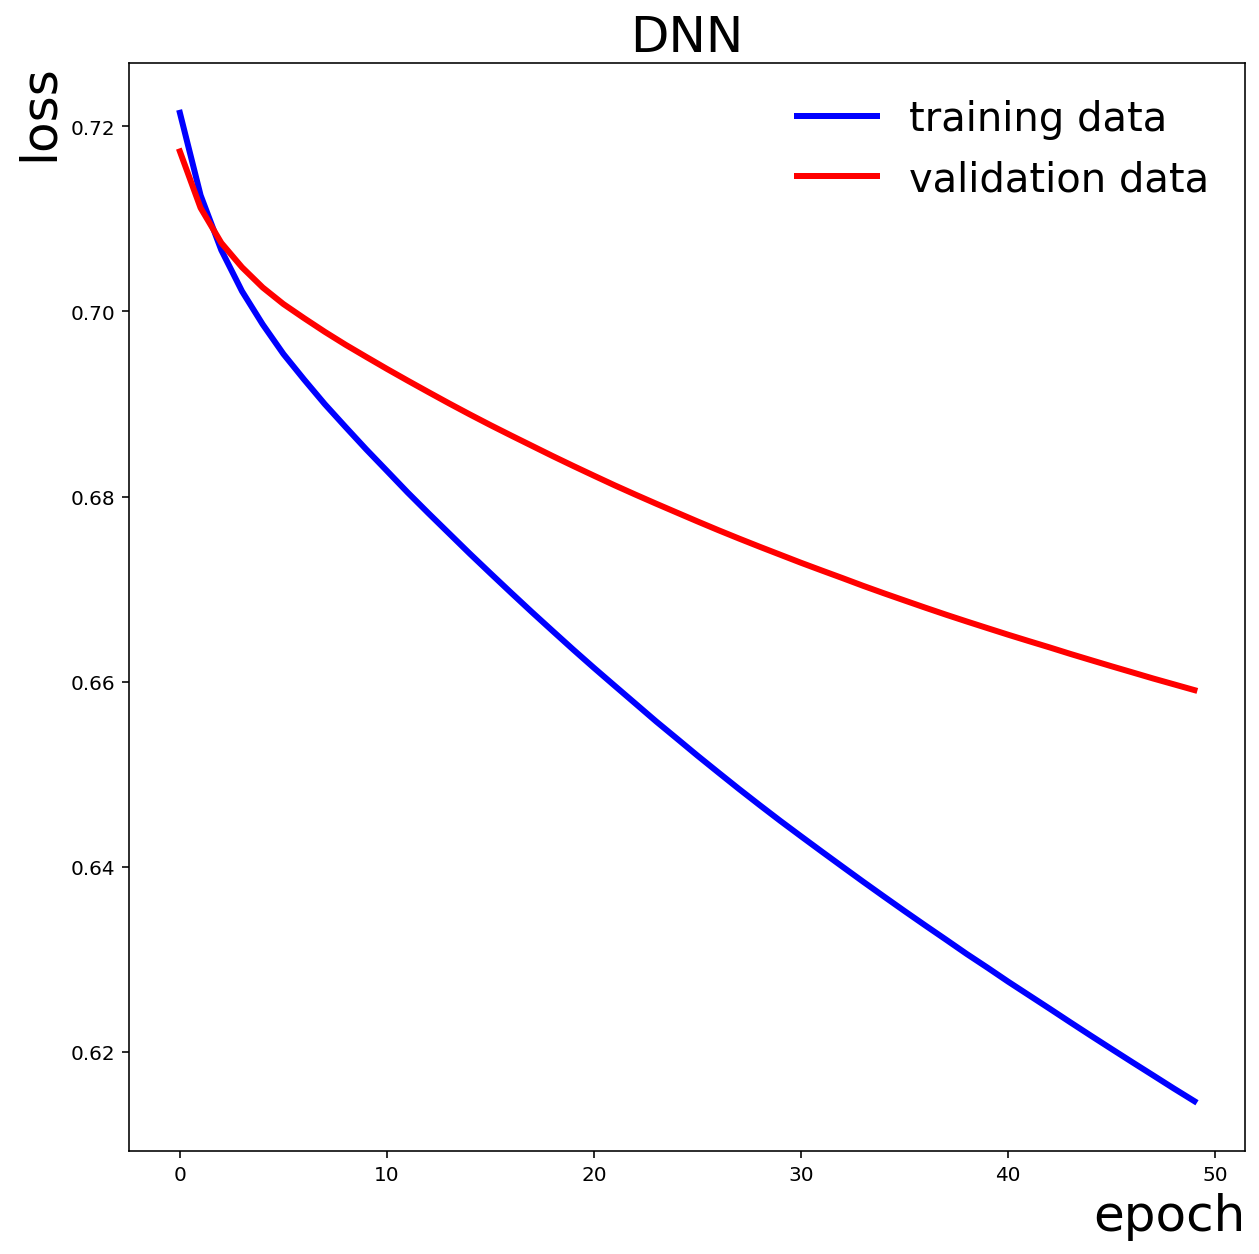

In [4]:
################################################################################################################
# Code for 1.3
# Learning Curve
# 1. Please make a learning curve of the DNN from 1.2
# 2. The x-axis will be epoch and y-axis will be loss.
# 3. You need to put learning curve of training and validation in this figure together.

# Performance
# 4. Please use test data set to study performance.
# 5. Please use the first element in each prediction vector to calculate AUC.
# 6. Please use the first element in each prediction vector to make a figure for ROC.
# 7. Please make a figure for confusion matrix.
################################################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Please code in this cell

print(History_jet.history.keys())


fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.plot(History_jet.history["loss"], label='training data',c='blue',linewidth = 3)
plt.plot(History_jet.history["val_loss"], label='validation data',c='red',linewidth = 3)

plt.title("DNN", fontsize=25)
ax.set_ylabel('loss', fontsize=25,horizontalalignment='right',y=1)
ax.set_xlabel('epoch', fontsize=25,horizontalalignment='right',x=1)
plt.legend(loc='best', prop={'size':20}, edgecolor = "w",fancybox=False, framealpha=0)


plt.show()



################################################################################################################

Test accuracy is 0.6655763983726501


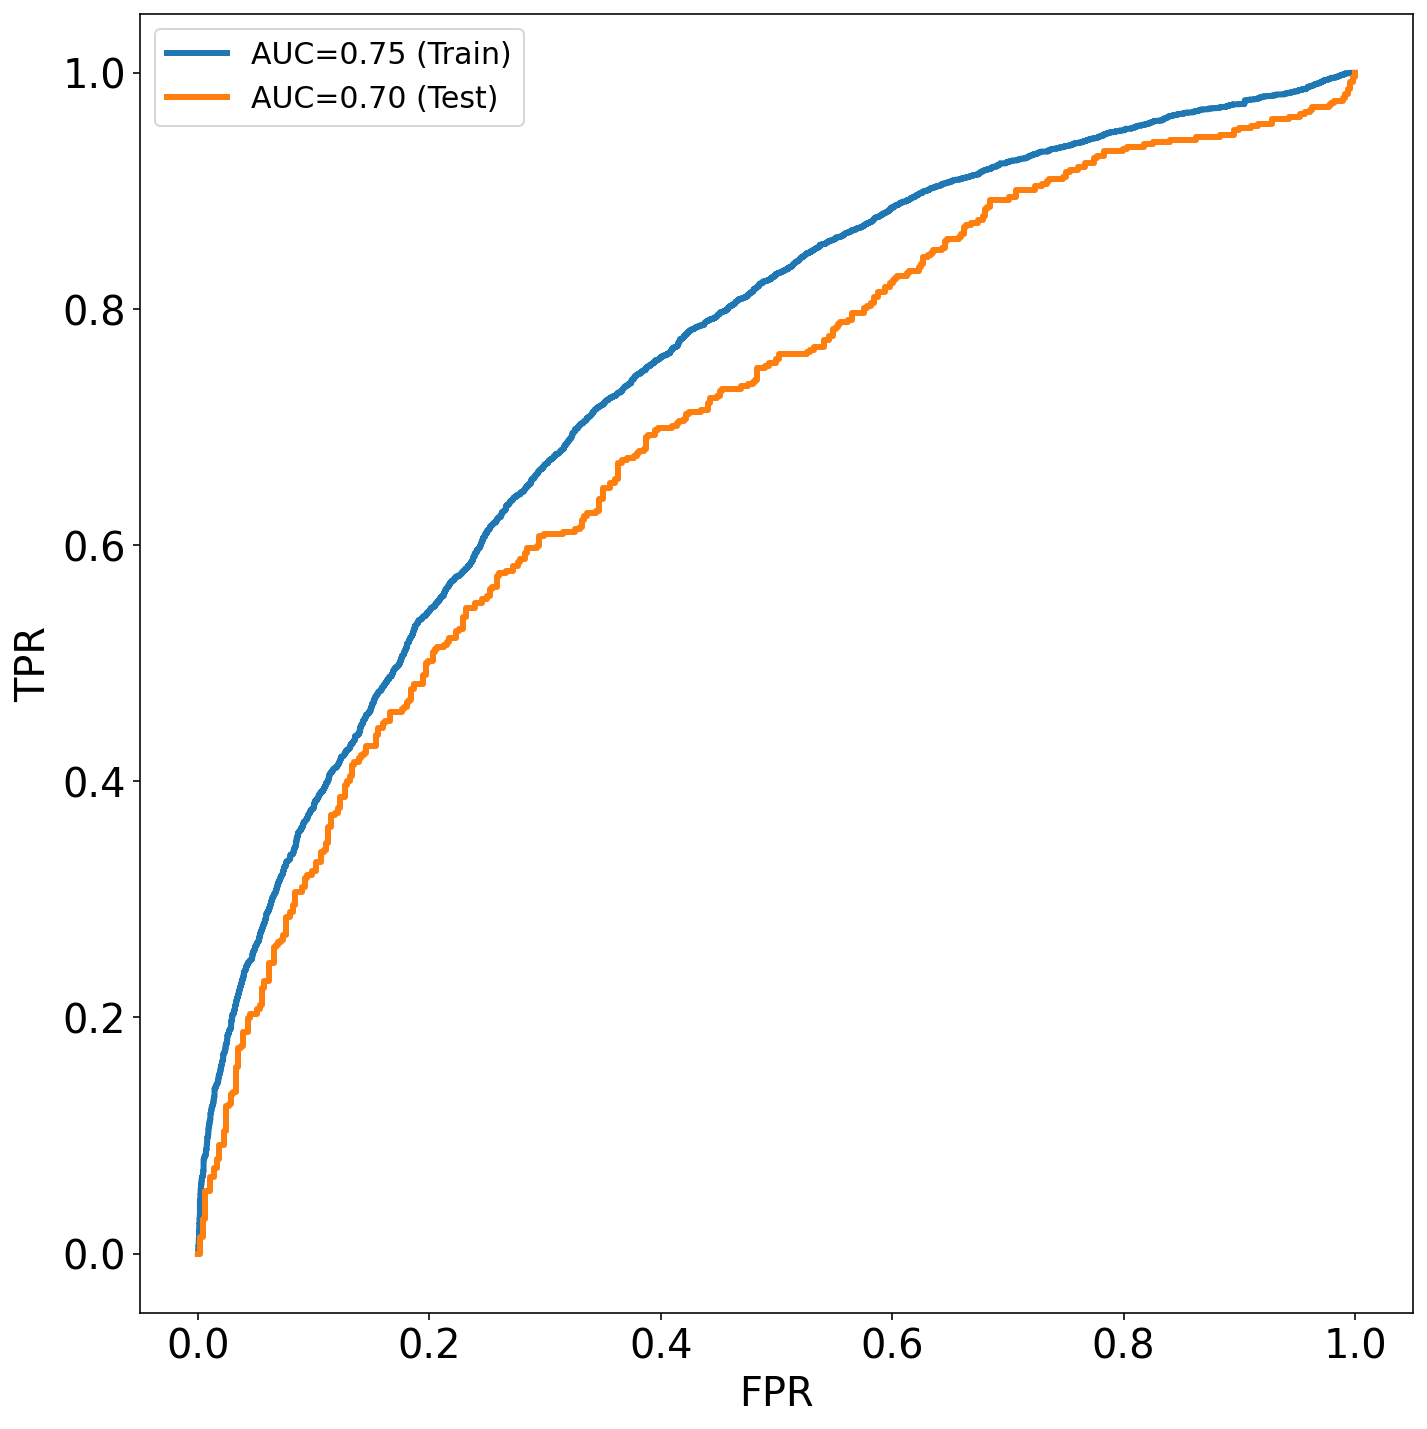

In [5]:

model = load_model("./model_DNN.h5")

prediction_train = model.predict(x_train_jet)
prediction_test = model.predict(x_test_jet)

scores = model.evaluate(x_test_jet, target_test, verbose=0)
print("Test accuracy is {}".format(scores))

axis = 0
if axis == 0:
    Class = "W/Z jets"
    other = "Quark jets"
elif axis == 1:
    Class = "Quark jets"
    other = "W/Z jets"
    
auc_train = metrics.roc_auc_score(target_train[:,axis],prediction_train[:,axis])
auc_test = metrics.roc_auc_score(target_test[:,axis],prediction_test[:,axis])

FalsePositive_train, TruePositive_train, _ = metrics.roc_curve(target_train[:,axis],prediction_train[:,axis])
FalsePositive_test, TruePositive_test, _ = metrics.roc_curve(target_test[:,axis],prediction_test[:,axis])

fig, ax = plt.subplots(1,1, figsize=(10,10))


plt.plot(FalsePositive_train, TruePositive_train,linewidth = 3, linestyle="-", label='AUC={0:.2f} (Train)'.format(auc_train))
plt.plot(FalsePositive_test, TruePositive_test,linewidth = 3, linestyle="-", label='AUC={0:.2f} (Test)'.format(auc_test))

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("TPR",fontsize=20)
plt.xlabel("FPR",fontsize=20)
plt.legend(ncol=1,fontsize=15) 
plt.tight_layout()

plt.show()

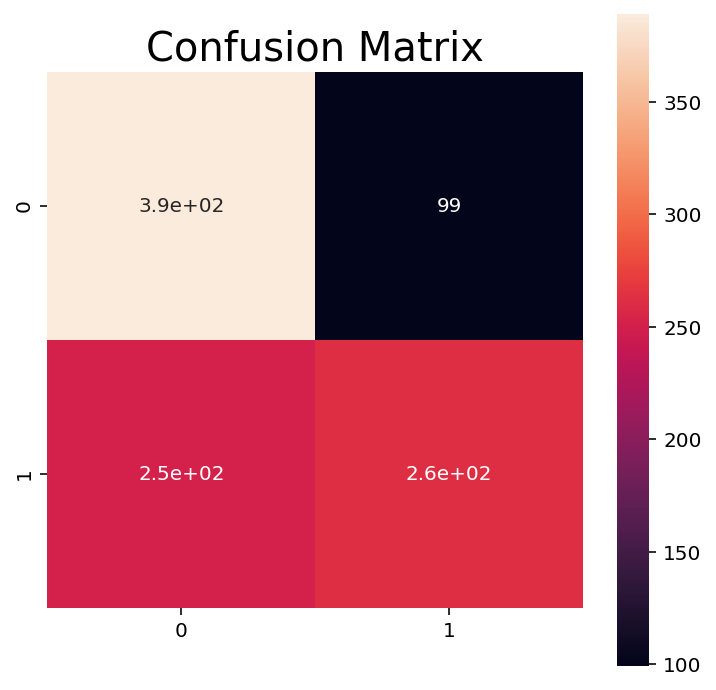

In [6]:
import seaborn as sns

cmatrix_test = confusion_matrix(target_test[:, axis], (prediction_test[:, axis] > 0.5).astype("int32"))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Confusion Matrix', fontsize=20)
sns.heatmap(data=cmatrix_test, square=True, annot=True, ax=ax)
plt.show()

# Part-2 Convolutional Neural Network
---
Here, we will use 3-channel data for CNN.   
For this CNN, we will use 3-channel data with shape (3,40,40) for training.

## 2.1 Load Data

* Please load data and labels in the "Lab_Train" folder, in the "Lab_Validation" folder and in "Lab_Test" folder.
* Please load top 10,000 data in "Lab_Train" folder.
* Please load top 1,000 data in "Lab_Validation" folder.
* Please load top 1,000 data in "Lab_Test" folder.
* After you load data, please check that each image shape is (3,40,40)
* Check statistic balance



In [7]:
################################################################################################################
# Code for 2.1

# 1. Please load data and labels in the "Lab_Train" folder, in the "Lab_Validation" folder and in "Lab_Test" folder.
# 2. Please load top 10,000 data in "Lab_Train" folder.
# 3. Please load top 1,000 data in "Lab_Validation" folder.
# 4. Please load top 1,000 data in "Lab_Test" folder.
# 5. After you load data, please check that each image shape is (3,40,40)
# 6. Check statistic balance
################################################################################################################
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
################################################################################################################
# Please code in this cell
"""
Declare a common path
"""
path  = "/kaggle/input/phys591000-week07"

"""
Load a dictionary: "train_dict.csv" in the "Lab_Train" folder.
"""

train_dict = pd.read_csv(path + "/Lab_Train/train_dict.csv")
print("\n")
print("Top 10 event infomation")
print(train_dict.head(10))




"""
Load a dictionary: "val_dict.csv" in the "Lab_Validation" folder.
"""

val_dict = pd.read_csv(path + "/Lab_Validation/val_dict.csv")
print("\n")
print("Top 10 event infomation")
print(val_dict.head(10))




"""
Load a dictionary: "test_dict.csv" in the "Lab_Test" folder.
"""

test_dict =pd.read_csv(path + "/Lab_Test/test_dict.csv")
print("\n")
print("Top 10 event infomation")
print(test_dict.head(10))




"""
Load top 10,000 events in the "Lab_Train" folder.
"x_train_jet" is our images and "target_train" is our labels.
"""

x_train_jet = []

for i in range(10000):
    x_jet_path = path + "/Lab_Train/" + train_dict["Jet_Images"][i]
    x_jet_tmp = np.load(x_jet_path)["jet_images"]
    x_train_jet.append(x_jet_tmp)





x_train_jet = np.array(x_train_jet)       
        
target_train = train_dict["Y"][:10000]



"""
Load top 1,000 events in the "Lab_Validation" folder.
"x_train_jet" is our images and "target_val" is our labels.
"""
x_val_jet = []

for i in range(1000):
    x_jet_path = path + "/Lab_Validation/" + val_dict["Jet_Images"][i]
    x_jet_tmp = np.load(x_jet_path)["jet_images"]
    x_val_jet.append(x_jet_tmp)




x_val_jet = np.array(x_val_jet)       
        
target_val = val_dict["Y"][:1000]




"""
Load top 1,000 events in the "Lab_Test" folder.
"x_test_jet" is our images and "target_test" is our labels.
"""
x_test_jet = []

for i in range(1000):
    x_jet_path = path + "/Lab_Test/" + test_dict["Jet_Images"][i]
    x_jet_tmp = np.load(x_jet_path)["jet_images"]
    x_test_jet.append(x_jet_tmp)




x_test_jet = np.array(x_test_jet)       
        
target_test = val_dict["Y"][:1000]





"""
Check statistic balance for data
"""
print("\n")
print("There are {} W/Z jets in the test data set.".format(len(target_test[target_test==0])))
print("There are {} quark jets in the test data set.".format(len(target_test[target_test==1])))






"""
Transfrom our label into one-hot code
"""
target_test = to_categorical(np.array(target_test))
target_train = to_categorical(np.array(target_train))
target_val = to_categorical(np.array(target_val))






"""
Check data shape
"""
print("\n")
print("Train data shape: ",x_train_jet.shape)
print("TEST data shape: ",x_test_jet.shape)
print("val data shape: ",x_val_jet.shape)

################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\n")
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
################################################################################################################

Fri Apr 09 16:00:30 2021


Top 10 event infomation
                        Jet_Images  Y
0   Jet_Images_1/x_train_jet_1.npz  0
1   Jet_Images_1/x_train_jet_2.npz  0
2   Jet_Images_1/x_train_jet_3.npz  0
3   Jet_Images_1/x_train_jet_4.npz  1
4   Jet_Images_1/x_train_jet_5.npz  1
5   Jet_Images_1/x_train_jet_6.npz  1
6   Jet_Images_1/x_train_jet_7.npz  1
7   Jet_Images_1/x_train_jet_8.npz  1
8   Jet_Images_1/x_train_jet_9.npz  1
9  Jet_Images_1/x_train_jet_10.npz  0


Top 10 event infomation
                      Jet_Images  Y
0   Jet_Images_1/x_val_jet_1.npz  1
1   Jet_Images_1/x_val_jet_2.npz  0
2   Jet_Images_1/x_val_jet_3.npz  0
3   Jet_Images_1/x_val_jet_4.npz  1
4   Jet_Images_1/x_val_jet_5.npz  1
5   Jet_Images_1/x_val_jet_6.npz  0
6   Jet_Images_1/x_val_jet_7.npz  1
7   Jet_Images_1/x_val_jet_8.npz  0
8   Jet_Images_1/x_val_jet_9.npz  0
9  Jet_Images_1/x_val_jet_10.npz  0


Top 10 event infomation
                       Jet_Images  Y
0   Jet_Images_1/x_test_jet_1.npz  1
1   Jet_I

## 2.2 Bulid a CNN Architecture and Training

* Please create a CNN architecture
* The architecture should be
 
Sequential ->    
one 2D Convolutional layer (filters=32, kernel_size=(5, 5), strides=(1, 1)) ->    
MaxPooling layer (pool_size=(2, 2), strides=(2, 2)) ->    
Flatten ->    
Dense layer with 300 neurons ->    
Output Dense layer with 2 neurons   


* "relu" will be activation function for each hidden layer, and "softmax" will be the activation function for output layer.
* `Adadelta` will be the optimizer and `categorical_crossentropy` will be the loss function.
* Please visualize your Architecture.
* Please train your DNN model with `batch_size=512` and `epochs=50`.
* Please save your model and name it to be `model_CNN.h5`.


[Hint : Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn)      
[Hint : How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)   
[Hint : Model Training](https://keras.io/api/models/model_training_apis/)  




In [8]:
################################################################################################################
# Code for 2.2
# Sequential ->
# one 2D Convolutional layer (filters=32, kernel_size=(5, 5), strides=(1, 1)) ->
# MaxPooling layer (pool_size=(2, 2), strides=(2, 2)) ->
# Flatten ->
# Dense layer with 300 neurons ->
# Output Dense layer with 2 neurons

# 3. "relu" will be activation function for each hidden layer, and "softmax" will be the activation function for output layer.
# 4. Adadelta will be the optimizer and categorical_crossentropy will be the loss function.
# 5. Please visualize your Architecture.
# 6. Please train your DNN model with `batch_size=512` and `epochs=50`.
# 7. Please save your model and name it to be `model_CNN.h5`.
################################################################################################################
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
################################################################################################################
# Please code in this cell

"""
Declare the Input Shape
"""
input_shape = (3,40,40)



"""
Create a Sequential Model
"""
model_jet_lab2 = Sequential(name = 'Sequential_for_jet2')





"""
Add a "Conv2D" Layer into the Sequential Model
"""

model_jet_lab2.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 data_format='channels_first',
#                data_format='channels_last',
                input_shape=input_shape, 
                name = 'jet'))






"""
Add a "MaxPooling2D" Layer into the Sequential Model
"""
model_jet_lab2.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=(2, 2),
                           data_format='channels_first', 
#                            data_format='channels_last',
                           name = 'jet_MaxPooling_1'))











"""
Flatten
"""

model_jet_lab2.add(Flatten(name = 'jet_flatten'))




"""
Put Output from Flatten Layer into "Dense" Layer with 300 neurons
"""

model_jet_lab2.add(Dense(300, activation='relu', name = 'jet_dense_1'))




"""
Add Output "Dense" Layer with 2 neurons into the Sequential Model
"""

model_jet_lab2.add(Dense(2, activation='softmax', name = 'jet_dense_2'))




"""
Define the Optimizer
"""

model_opt = keras.optimizers.Adadelta()

"""
Compile Model
"""

model_jet_lab2.compile(loss="categorical_crossentropy",
#                    loss = "binary_crossentropy",
                   optimizer=model_opt,
                   metrics=["accuracy","mse"])





"""
Print Architecture
"""
model_jet_lab2.summary()

"""
Model Training
"""
History_jet_lab2 = model_jet_lab2.fit( x_train_jet, target_train,
               validation_data= (x_val_jet, target_val),
               batch_size=512,
               epochs=50,
               verbose=1
              )


"""
Save Model
"""
model_jet_lab2.save("./model_jet_lab2.h5")



################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\n")
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
################################################################################################################

Fri Apr 09 16:01:34 2021
Model: "Sequential_for_jet2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
jet (Conv2D)                 (None, 32, 36, 36)        2432      
_________________________________________________________________
jet_MaxPooling_1 (MaxPooling (None, 32, 18, 18)        0         
_________________________________________________________________
jet_flatten (Flatten)        (None, 10368)             0         
_________________________________________________________________
jet_dense_1 (Dense)          (None, 300)               3110700   
_________________________________________________________________
jet_dense_2 (Dense)          (None, 2)                 602       
Total params: 3,113,734
Trainable params: 3,113,734
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 3s 27ms/step - loss: 0.726

## 2.3 Learning Curve and Performance of the CNN 

Learning Curve
* Please make a learning curve of the CNN from 2.2
* The x-axis will be epoch and y-axis will be loss.
* You need to put learning curve of training and validation in this figure together.

Performance
* Please use test data set to study performance.
* Please use the first element in each prediction vector to calculate AUC.
* Please use the first element in each prediction vector to make a figure for ROC.    
* Please make a figure for confusion matrix.


dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])


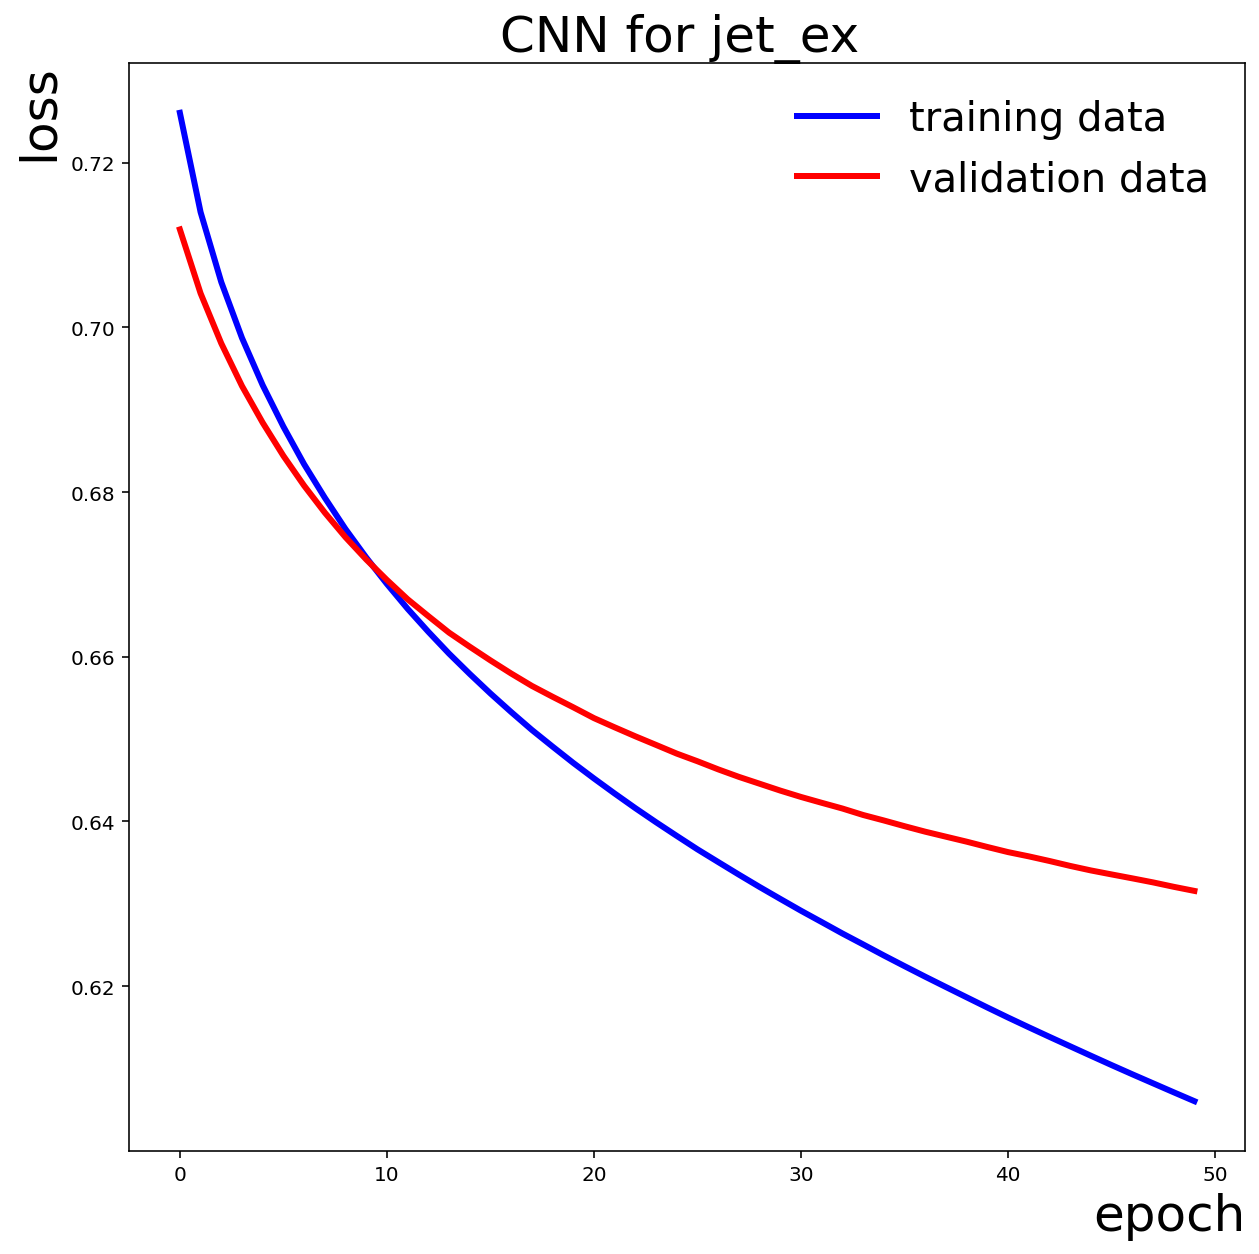



Time Cost : 0.3065 min


In [9]:
################################################################################################################
# Code for 2.3
# Learning Curve
# 1. Please make a learning curve of the CNN from 2.2
# 2. The x-axis will be epoch and y-axis will be loss.
# 3. You need to put learning curve of training and validation in this figure together.

# Performance
# 4. Please use test data set to study performance.
# 5. Please use the first element in each prediction vector to calculate AUC.
# 6. Please use the first element in each prediction vector to make a figure for ROC
# 7. Please make a figure for confusion matrix.
################################################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Please code in this cell

print(History_jet_lab2.history.keys())


fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.plot(History_jet_lab2.history["loss"], label='training data',c='blue',linewidth = 3)
plt.plot(History_jet_lab2.history["val_loss"], label='validation data',c='red',linewidth = 3)

plt.title("CNN for jet_ex ", fontsize=25)

ax.set_ylabel('loss', fontsize=25,horizontalalignment='right',y=1)
ax.set_xlabel('epoch', fontsize=25,horizontalalignment='right',x=1)
plt.legend(loc='best', prop={'size':20}, edgecolor = "w",fancybox=False, framealpha=0)


plt.show()

#########################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\n")
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))










################################################################################################################

Test accuracy is 51.30000114440918


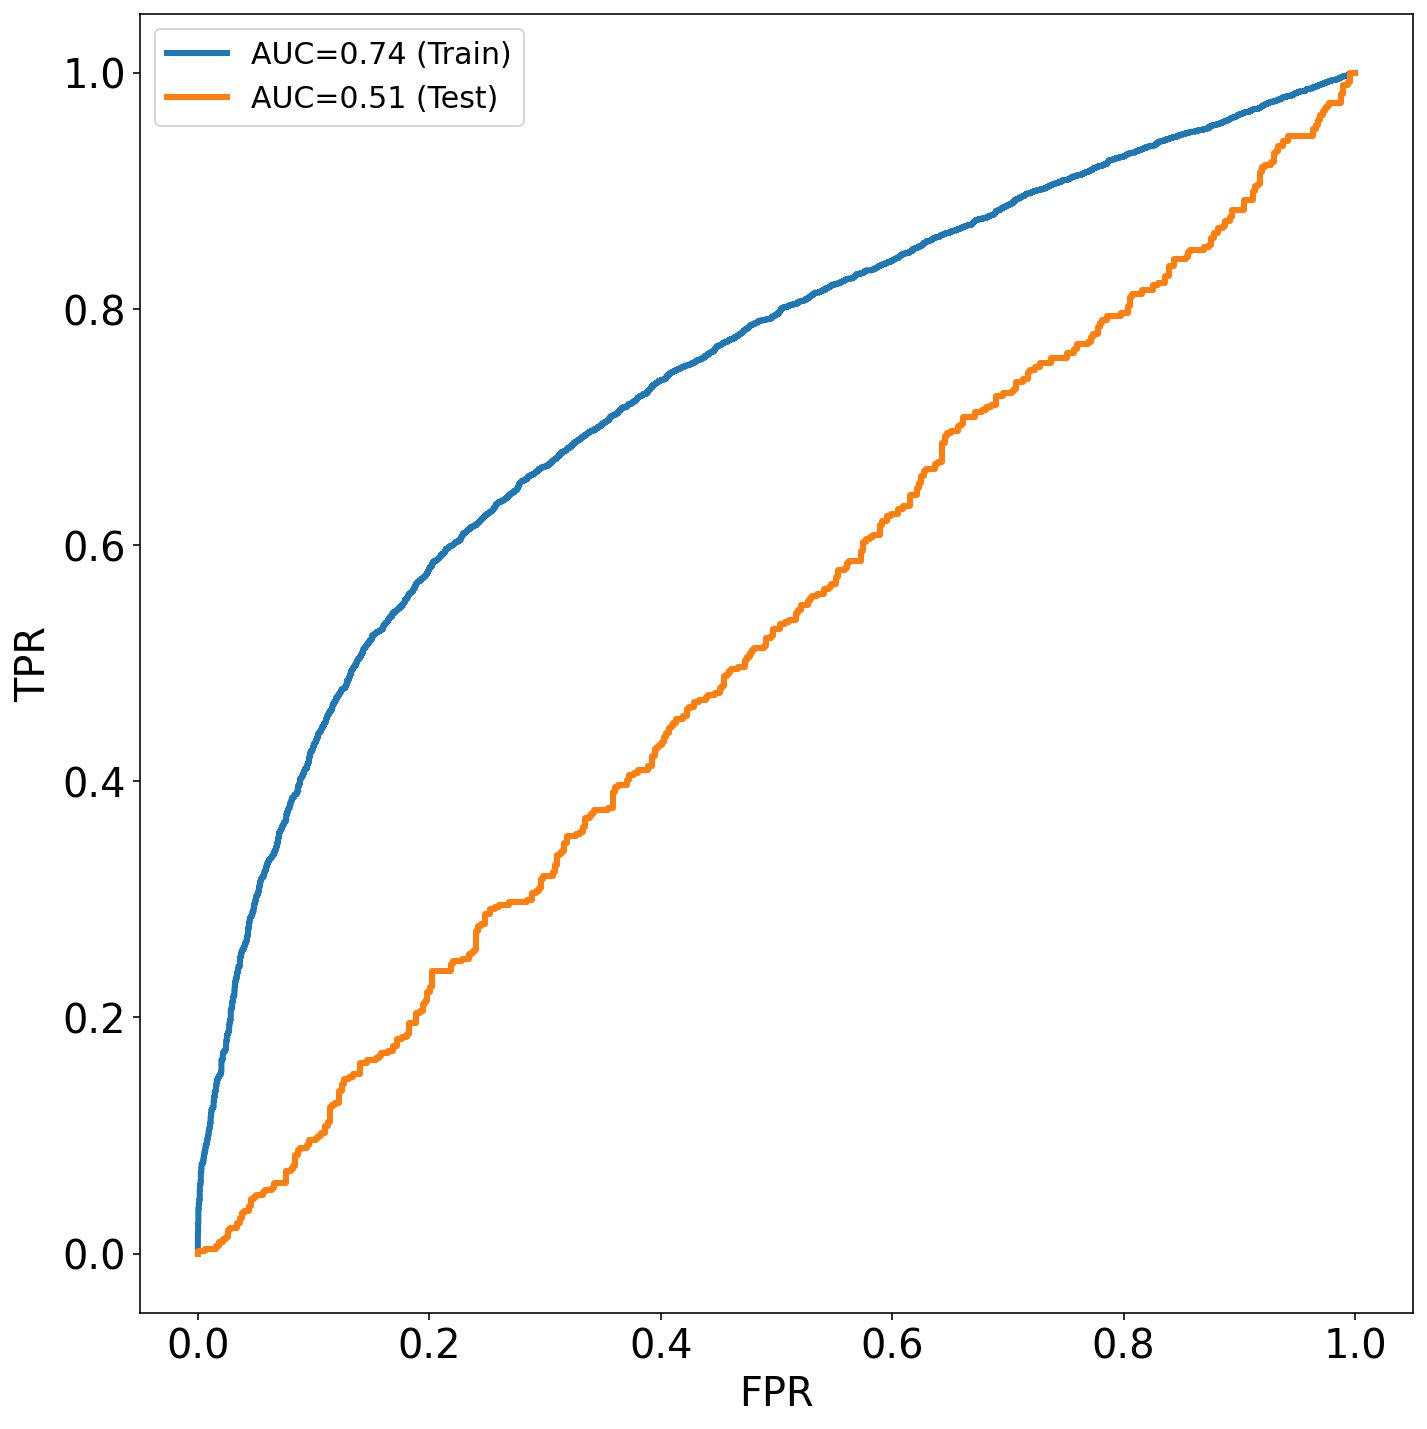

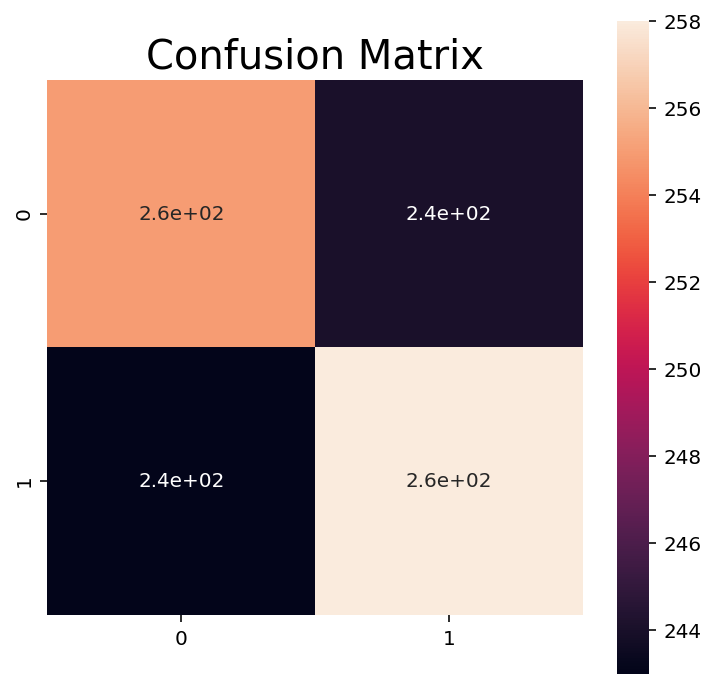



Time Cost : 0.3383 min


In [10]:
# Performance
# 4. Please use test data set to study performance.
# 5. Please use the first element in each prediction vector to calculate AUC.
# 6. Please use the first element in each prediction vector to make a figure for ROC.    
# 7. Please make a figure for confusion matrix.
################################################################################################################
"""
Please load your model.
After making prediction for the test data set, please calculate AUC and make a ROC figure.
Please make a figure for ROC using the first element in each prediction vector.
"""
################################################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
#Your code in this section

"""
Load Model
"""
Model_jet = load_model("./model_jet_lab2.h5")




"""
Make Prediction for training and test data set, respectively
"""

prediction_train = Model_jet.predict(x_train_jet)
prediction_test = Model_jet.predict(x_test_jet)







"""
Evaluate the model
"""

scores = Model_jet.evaluate(x_test_jet, target_test, verbose=0)
print("Test accuracy is {}".format(scores[1] * 100))




"""
Define axis for ROC
"""  
axis = 0
if axis == 0:
    Class = "W/Z jets"
    other = "Quark jets"
elif axis == 1:
    Class = "Quark jets"
    other = "W/Z jets"

"""
Calculate AUC for training and test data set, respectively
"""
auc_train = metrics.roc_auc_score(target_train[:,axis],prediction_train[:,axis])
auc_test = metrics.roc_auc_score(target_test[:,axis],prediction_test[:,axis])


"""
Calculate FPR and TPR for training and test data set, respectively
"""
FalsePositive_train, TruePositive_train, _ = metrics.roc_curve(target_train[:,axis],prediction_train[:,axis])
FalsePositive_test, TruePositive_test, _ = metrics.roc_curve(target_test[:,axis],prediction_test[:,axis])





"""
Generate ROC figure
"""

fig, ax = plt.subplots(1,1, figsize=(10,10))


plt.plot(FalsePositive_train, TruePositive_train,linewidth = 3, linestyle="-", label='AUC={0:.2f} (Train)'.format(auc_train))
plt.plot(FalsePositive_test, TruePositive_test,linewidth = 3, linestyle="-", label='AUC={0:.2f} (Test)'.format(auc_test))

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("TPR",fontsize=20)
plt.xlabel("FPR",fontsize=20)
plt.legend(ncol=1,fontsize=15) 
plt.tight_layout()

plt.show()


import seaborn as sns

cmatrix_test = confusion_matrix(target_test[:, axis], (prediction_test[:, axis] > 0.5).astype("int32"))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Confusion Matrix', fontsize=20)
sns.heatmap(data=cmatrix_test, square=True, annot=True, ax=ax)
plt.show()


#########################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\n")
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))




# Part-3 Convolutional Neural Network - ZOOM In
---
Here, we will use 3-channel data for CNN.
Instead of using full 40X40 pixels, we will zoom in and use central 20X20 pixels for trianing.

## 3.1 Load Data and Preprocessing

* Please load data and labels in the "Lab_Train" folder, in the "Lab_Validation" folder and in "Lab_Test" folder.
* Please load top 10,000 data in "Lab_Train" folder and select central 20X20 pixels for each channel.
* Please load top 1,000 data in "Lab_Validation" folder and select central 20X20 pixels for each channel.
* Please load top 1,000 data in "Lab_Test" folder and select central 20X20 pixels for each channel.
* After you load data, please check that each image shape is (3,20,20)
* Check statistic balance



In [11]:
################################################################################################################
# Code for 3.1
# 1. Please load data and labels in the "Lab_Train" folder, in the "Lab_Validation" folder and in "Lab_Test" folder.
# 2. Please load top 10,000 data in "Lab_Train" folder and select central 20X20 pixels for each channel.
# 3. Please load top 1,000 data in "Lab_Validation" folder and select central 20X20 pixels for each channel.
# 4. Please load top 1,000 data in "Lab_Test" folder and select central 20X20 pixels for each channel.
# 5. After you load data, please check that each image shape is (3,20,20)
# 6. Check statistic balance
################################################################################################################
#Your code in this section

"""
Declare a common path
"""
path  = "/kaggle/input/phys591000-week07"

"""
Load a dictionary: "train_dict.csv" in the "Lab_Train" folder.
"""
train_dict = pd.read_csv(path + "/Lab_Train/train_dict.csv")
print("\n")
print("Top 10 event infomation")
print(train_dict.head(10))




"""
Load a dictionary: "val_dict.csv" in the "Lab_Validation" folder.
"""
val_dict = pd.read_csv(path + "/Lab_Validation/val_dict.csv")
print("\n")
print("Top 10 event infomation")
print(val_dict.head(10))




"""
Load a dictionary: "test_dict.csv" in the "Lab_Test" folder.
"""
test_dict =pd.read_csv(path + "/Lab_Test/test_dict.csv")
print("\n")
print("Top 10 event infomation")
print(test_dict.head(10))





"""
Load top 10,000 events in the "Lab_Train" folder.
"x_train_jet" is our images and "target_train" is our labels.
"""
x_train_jet = []

for i in range(10000):
    x_jet_path = path + "/Lab_Train/" + train_dict["Jet_Images"][i]
    x_jet_tmp = np.load(x_jet_path)["jet_images"]
    x_train_jet.append(x_jet_tmp)


x_train_jet = np.array(x_train_jet)       
x_train_jet=x_train_jet[0:10000,0:3,10:30,10:30]        
target_train = train_dict["Y"][:10000]


"""
Load top 1,000 events in the "Lab_Validation" folder.
"x_train_jet" is our images and "target_val" is our labels.
"""

x_val_jet = []

for i in range(1000):
    x_jet_path = path + "/Lab_Validation/" + val_dict["Jet_Images"][i]
    x_jet_tmp = np.load(x_jet_path)["jet_images"]
    x_val_jet.append(x_jet_tmp)



x_val_jet = np.array(x_val_jet)       
x_val_jet=x_val_jet[0:1000,0:3,10:30,10:30]        
target_val = val_dict["Y"][:1000]


"""
Load top 1,000 events in the "Lab_Test" folder.
"x_test_jet" is our images and "target_test" is our labels.
"""
x_test_jet = []

for i in range(1000):
    x_jet_path = path + "/Lab_Test/" + test_dict["Jet_Images"][i]
    x_jet_tmp = np.load(x_jet_path)["jet_images"]
    x_test_jet.append(x_jet_tmp)




x_test_jet = np.array(x_test_jet)       
x_test_jet=x_test_jet[0:1000,0:3,10:30,10:30]        
target_test = val_dict["Y"][:1000]


"""
Check statistic balance for data
"""
print("\n")
print("There are {} W/Z jets in the test data set.".format(len(target_test[target_test==0])))
print("There are {} quark jets in the test data set.".format(len(target_test[target_test==1])))



"""
Transfrom our label into one-hot code
"""
target_test = to_categorical(np.array(target_test))
target_train = to_categorical(np.array(target_train))
target_val = to_categorical(np.array(target_val))



"""
Check data shape
"""
print("\n")
print("Train data shape: ",x_train_jet.shape)

################################################################################################################



Top 10 event infomation
                        Jet_Images  Y
0   Jet_Images_1/x_train_jet_1.npz  0
1   Jet_Images_1/x_train_jet_2.npz  0
2   Jet_Images_1/x_train_jet_3.npz  0
3   Jet_Images_1/x_train_jet_4.npz  1
4   Jet_Images_1/x_train_jet_5.npz  1
5   Jet_Images_1/x_train_jet_6.npz  1
6   Jet_Images_1/x_train_jet_7.npz  1
7   Jet_Images_1/x_train_jet_8.npz  1
8   Jet_Images_1/x_train_jet_9.npz  1
9  Jet_Images_1/x_train_jet_10.npz  0


Top 10 event infomation
                      Jet_Images  Y
0   Jet_Images_1/x_val_jet_1.npz  1
1   Jet_Images_1/x_val_jet_2.npz  0
2   Jet_Images_1/x_val_jet_3.npz  0
3   Jet_Images_1/x_val_jet_4.npz  1
4   Jet_Images_1/x_val_jet_5.npz  1
5   Jet_Images_1/x_val_jet_6.npz  0
6   Jet_Images_1/x_val_jet_7.npz  1
7   Jet_Images_1/x_val_jet_8.npz  0
8   Jet_Images_1/x_val_jet_9.npz  0
9  Jet_Images_1/x_val_jet_10.npz  0


Top 10 event infomation
                       Jet_Images  Y
0   Jet_Images_1/x_test_jet_1.npz  1
1   Jet_Images_1/x_test_jet_2.npz 

In [12]:
################################################################################################################
# Code for 3.2

# 1. Please create a CNN architecture (the same as 2.2)
# 2. The architecture should be

# Sequential ->
# one 2D Convolutional layer (filters=32, kernel_size=(5, 5), strides=(1, 1)) ->
# MaxPooling layer (pool_size=(2, 2), strides=(2, 2)) ->
# Flatten ->
# Dense layer with 300 neurons ->
# Output Dense layer with 2 neurons

# 3. "relu" will be activation function for each hidden layer, and "softmax" will be the activation function for output layer.
# 4. Adadelta will be the optimizer and categorical_crossentropy will be the loss function.
# 5. Please visualize your Architecture.
# 6. Please train your DNN model with `batch_size=512` and `epochs=50`.
# 7. Please save your model and name it to be `model_CNN.h5`.
################################################################################################################
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
################################################################################################################
# Please code in this cell

"""
Declare the Input Shape
"""
input_shape = (3,20,20)



"""
Create a Sequential Model
"""
model_jet_lab4 = Sequential(name = 'Sequential_for_jet4')


"""
Add a "Conv2D" Layer into the Sequential Model
"""

model_jet_lab4.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 data_format='channels_first',
#                data_format='channels_last',
                input_shape=input_shape, 
                name = 'jet'))


"""
Add a "MaxPooling2D" Layer into the Sequential Model
"""
model_jet_lab4.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=(2, 2),
                           data_format='channels_first', 
#                            data_format='channels_last',
                           name = 'jet_MaxPooling_1'))


"""
Flatten
"""

model_jet_lab4.add(Flatten(name = 'jet_flatten'))




"""
Put Output from Flatten Layer into "Dense" Layer with 300 neurons
"""

model_jet_lab4.add(Dense(300, activation='relu', name = 'jet_dense_1'))




"""
Add Output "Dense" Layer with 2 neurons into the Sequential Model
"""

model_jet_lab4.add(Dense(2, activation='softmax', name = 'jet_dense_2'))




"""
Define the Optimizer
"""

model_opt = keras.optimizers.Adadelta()

"""
Compile Model
"""

model_jet_lab4.compile(loss="categorical_crossentropy",
#                    loss = "binary_crossentropy",
                   optimizer=model_opt,
                   metrics=["accuracy","mse"])





"""
Print Architecture
"""
model_jet_lab4.summary()

"""
Model Training
"""
History_jet_lab4 = model_jet_lab4.fit( x_train_jet, target_train,
               validation_data= (x_val_jet, target_val),
               batch_size=512,
               epochs=50,
               verbose=1
              )


"""
Save Model
"""
model_jet_lab4.save("./model_jet_lab4.h5")



################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\n")
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
################################################################################################################

Fri Apr 09 16:02:22 2021
Model: "Sequential_for_jet4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
jet (Conv2D)                 (None, 32, 16, 16)        2432      
_________________________________________________________________
jet_MaxPooling_1 (MaxPooling (None, 32, 8, 8)          0         
_________________________________________________________________
jet_flatten (Flatten)        (None, 2048)              0         
_________________________________________________________________
jet_dense_1 (Dense)          (None, 300)               614700    
_________________________________________________________________
jet_dense_2 (Dense)          (None, 2)                 602       
Total params: 617,734
Trainable params: 617,734
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 1s 17ms/step - loss: 0.7775 - 

## 3.3 Learning Curve and Performance of the CNN 

Learning Curve
* Please make a learning curve of the CNN from 3.2
* The x-axis will be epoch and y-axis will be loss.
* You need to put learning curve of training and validation in this figure together.

Performance
* Please use test data set to study performance.
* Please use the first element in each prediction vector to calculate AUC.
* Please use the first element in each prediction vector to make a figure for ROC.    
* Please make a figure for confusion matrix.





Fri Apr 09 16:02:31 2021
dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])


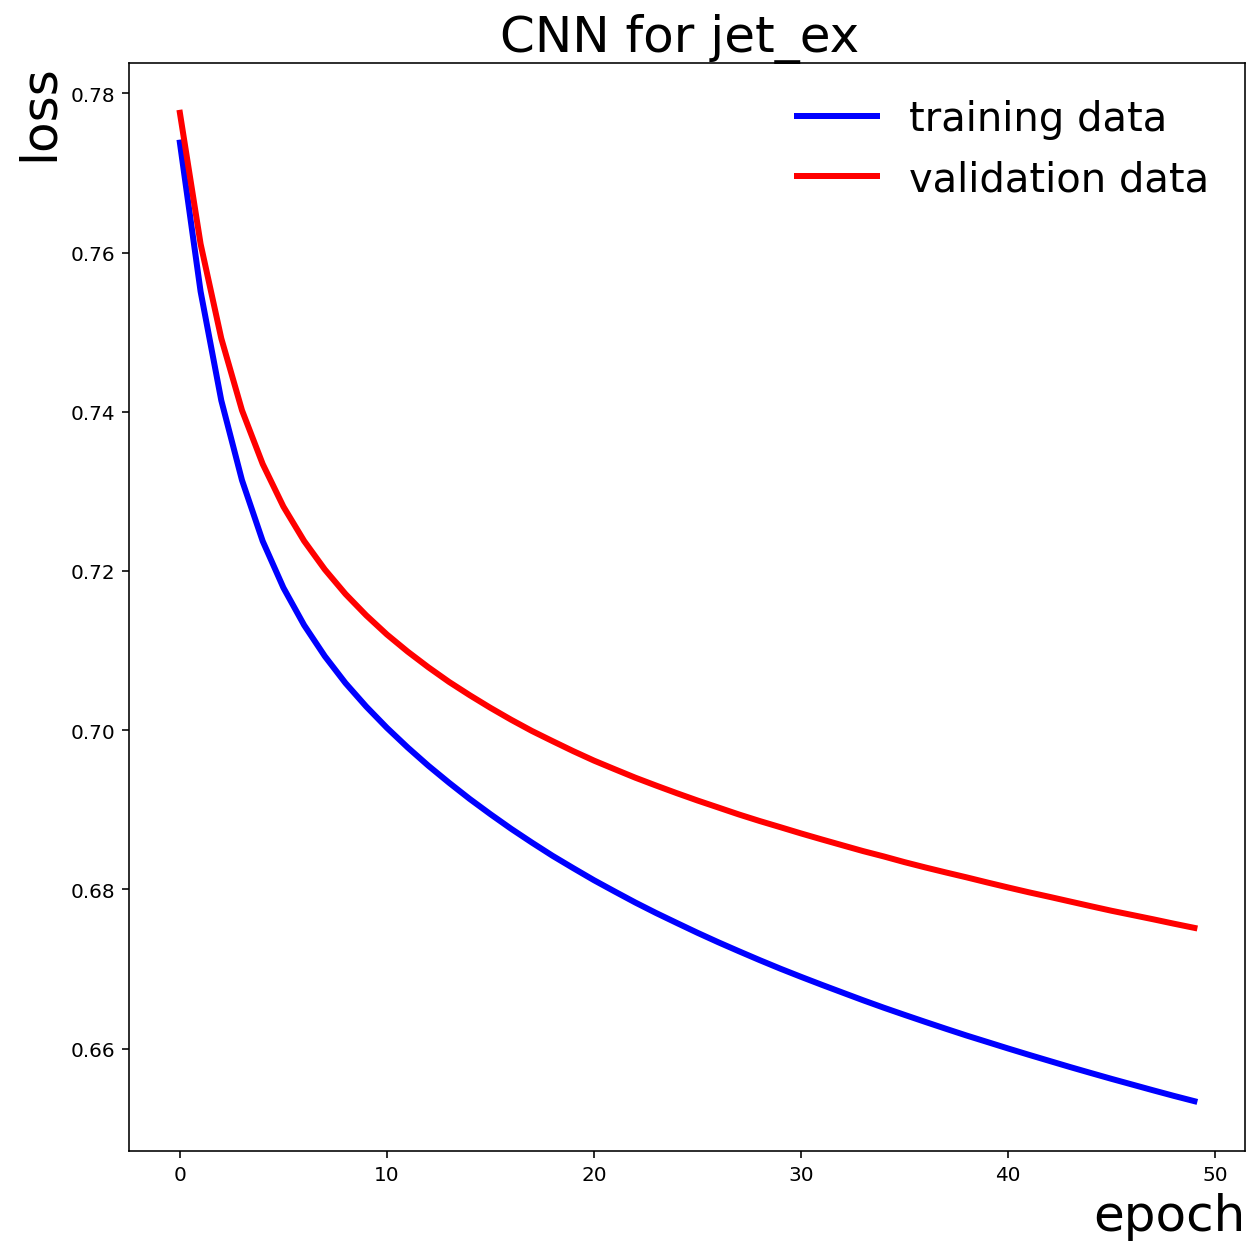



Time Cost : 0.0041 min


In [13]:
################################################################################################################
# Code for 3.3
# Learning Curve
# 1. Please make a learning curve of the CNN from 3.2
# 2. The x-axis will be epoch and y-axis will be loss.
# 3. You need to put learning curve of training and validation in this figure together.

# Performance
# 4. Please use test data set to study performance.
# 5. Please use the first element in each prediction vector to calculate AUC.
# 6. Please use the first element in each prediction vector to make a figure for ROC.    
# 7. Please make a figure for confusion matrix.
################################################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Please code in this cell

print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
################################################################################################################

print(History_jet_lab4.history.keys())


fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.plot(History_jet_lab4.history["loss"], label='training data',c='blue',linewidth = 3)
plt.plot(History_jet_lab4.history["val_loss"], label='validation data',c='red',linewidth = 3)

plt.title("CNN for jet_ex ", fontsize=25)

ax.set_ylabel('loss', fontsize=25,horizontalalignment='right',y=1)
ax.set_xlabel('epoch', fontsize=25,horizontalalignment='right',x=1)
plt.legend(loc='best', prop={'size':20}, edgecolor = "w",fancybox=False, framealpha=0)


plt.show()


#########################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\n")
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
################################################################################################################

Test accuracy is 50.300002098083496


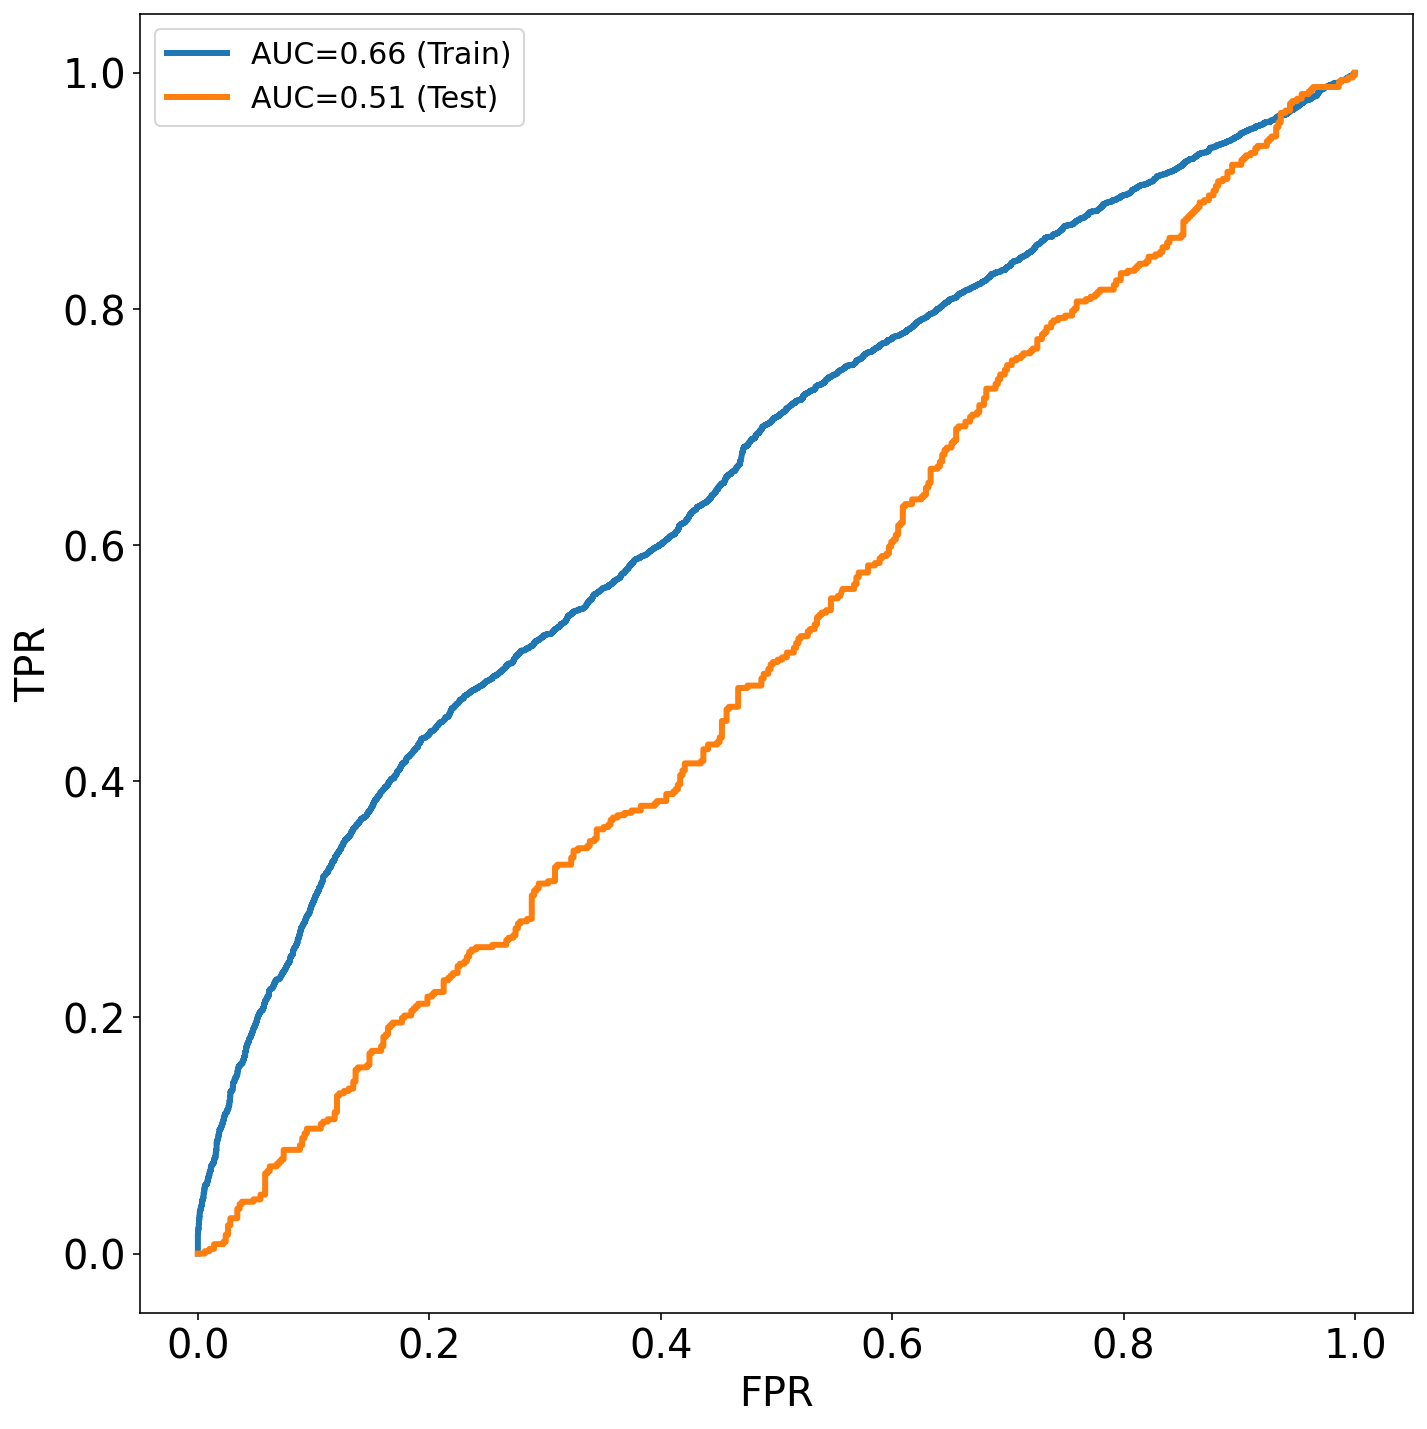

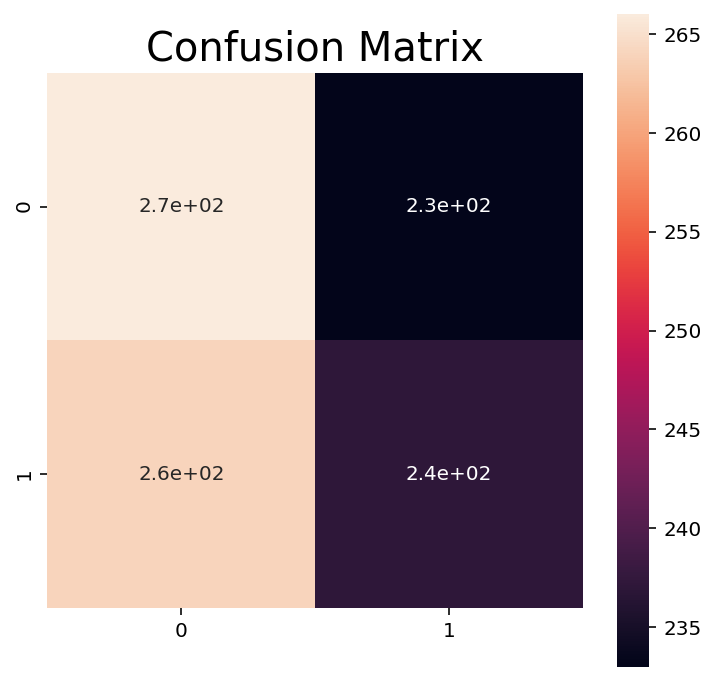



Time Cost : 0.0321 min


In [14]:
# Performance
# 4. Please use test data set to study performance.
# 5. Please use the first element in each prediction vector to calculate AUC.
# 6. Please use the first element in each prediction vector to make a figure for ROC.    
# 7. Please make a figure for confusion matrix.
################################################################################################################
"""
Please load your model.
After making prediction for the test data set, please calculate AUC and make a ROC figure.
Please make a figure for ROC using the first element in each prediction vector.
"""
################################################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
#Your code in this section

"""
Load Model
"""
Model_jet = load_model("./model_jet_lab4.h5")




"""
Make Prediction for training and test data set, respectively
"""

prediction_train = Model_jet.predict(x_train_jet)
prediction_test = Model_jet.predict(x_test_jet)







"""
Evaluate the model
"""

scores = Model_jet.evaluate(x_test_jet, target_test, verbose=0)
print("Test accuracy is {}".format(scores[1] * 100))




"""
Define axis for ROC
"""  
axis = 0
if axis == 0:
    Class = "W/Z jets"
    other = "Quark jets"
elif axis == 1:
    Class = "Quark jets"
    other = "W/Z jets"

"""
Calculate AUC for training and test data set, respectively
"""
auc_train = metrics.roc_auc_score(target_train[:,axis],prediction_train[:,axis])
auc_test = metrics.roc_auc_score(target_test[:,axis],prediction_test[:,axis])


"""
Calculate FPR and TPR for training and test data set, respectively
"""
FalsePositive_train, TruePositive_train, _ = metrics.roc_curve(target_train[:,axis],prediction_train[:,axis])
FalsePositive_test, TruePositive_test, _ = metrics.roc_curve(target_test[:,axis],prediction_test[:,axis])





"""
Generate ROC figure
"""

fig, ax = plt.subplots(1,1, figsize=(10,10))


plt.plot(FalsePositive_train, TruePositive_train,linewidth = 3, linestyle="-", label='AUC={0:.2f} (Train)'.format(auc_train))
plt.plot(FalsePositive_test, TruePositive_test,linewidth = 3, linestyle="-", label='AUC={0:.2f} (Test)'.format(auc_test))

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("TPR",fontsize=20)
plt.xlabel("FPR",fontsize=20)
plt.legend(ncol=1,fontsize=15) 
plt.tight_layout()

plt.show()

import seaborn as sns

cmatrix_test = confusion_matrix(target_test[:, axis], (prediction_test[:, axis] > 0.5).astype("int32"))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Confusion Matrix', fontsize=20)
sns.heatmap(data=cmatrix_test, square=True, annot=True, ax=ax)
plt.show()

#########################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\n")
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))



# Part-4 Discussion
##############################################################################   
* Please compare results between Lab 07: 1.3 and In-Class Quiz 07: Exercise 6.   
* Please compare results between Lab 07: 1.3 and Lab 07: 2.3.   
* Please compare results between Lab 07: 2.3 and Lab 07: 3.3.    

##############################################################################   
**Ans:**
1. In this case, we can see that CNN model in class has better performance than DNN in lab. CNN model can receive and process pixel data, so it is useful for image recognition. It can capture the structure in image, so it does better than DNN.
2. 
3. zoom in the image seem didn't affect the result. We think it because the dada is located in the center.
##############################################################################   

# Bonus - Load Large Data for Training
---
*** In part 2 and part 3, we only load 10,000 events for training. However, the data statistics is too low. If we want to let our model become more healthy, we should use more data for training. But the memory is limited, we can not load too many data into RAM. To conquer this difficulty, generator  is one of solutions for this issue. ***

* Please read reference to understand how to define generator.
* Please load data and labels in the "Lab_Train" folder, in the "Lab_Validation" folder and in "Lab_Test" folder.
* Please load top 100,000 data in "Lab_Train" folder using generator method. 
* Please load top 10,000 data in "Lab_Validation" using generator method. 
* Please load top 10,000 data in "Lab_Test" using generator method. 
* Pleas use the same CNN model as Part 2 to train the CNN model.

Learning Curve
* Please make a learning curve of the CNN from Bonus
* The x-axis will be epoch and y-axis will be loss.
* You need to put learning curve of training and validation in this figure together.

Performance
* Please use test data set to study performance.
* Please use the first element in each prediction vector to calculate AUC.
* Please use the first element in each prediction vector to make a figure for ROC.    
* Please make a figure for confusion matrix.


Hint: [Generator Method Example](https://www.kaggle.com/born2bdev/keras-cnn-with-custom-data-generator/comments)

Hint. [A detailed example of how to use data generators with Keras](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly)

In [15]:
################################################################################################################
# Code for Bonus
# 1. Please read reference to understand how to define generator.
# 2. Please load data and labels in the "Lab_Train" folder, in the "Lab_Validation" folder and in "Lab_Test" folder.
# 3. Please load top 100,000 data in "Lab_Train" folder using generator method. 
# 4. Please load top 10,000 data in "Lab_Validation" using generator method. 
# 5. Please load top 10,000 data in "Lab_Test" using generator method. 
# 6. Pleas use the same CNN model as Part 2 to train the CNN model.

# Learning Curve
# 7. Please make a learning curve of the CNN from Bonus
# 8. The x-axis will be epoch and y-axis will be loss.
# 9. You need to put learning curve of training and validation in this figure together.

# Performance
# 10. Please use test data set to study performance.
# 11. Please use the first element in each prediction vector to calculate AUC.
# 12. Please use the first element in each prediction vector to make a figure for ROC.    
# 13. Please make a figure for confusion matrix.
################################################################################################################
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
################################################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Please code in this cell


"""
Define generator()
"""

nb_train_samples = 100000
nb_val_samples = 10000
nb_test_samples = 10000

batch_size = 512




def train_generator():

    
    
    
    
            
def val_generator():

    
    
    
    
    
    
def test_generator():





"""
Define the Optimizer
"""




"""
Compile Model
"""




"""
Print Architecture
"""





"""
Model Training
"""





"""
Save Model
"""






"""
Learning Curve
"""



"""
Performance
"""



            
################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\n")
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))            
################################################################################################################

IndentationError: expected an indented block (<ipython-input-15-8fd2f5a11c24>, line 50)